

    user  beliefImprovement  query  recommended  recUtil  top  topUtil  time
0      1    1      1            2   -12.87    3   -12.87  0.21
1      1    1      2            2   -12.87    2   -12.87  0.42
2      1    1      3            2   -12.87    3   -12.87  0.59
3      1    2      1            2   -12.87    3   -12.87  0.04
4      1    2      2            2   -12.87    2   -12.87  0.07
5      1    2      3            2   -12.87    3   -12.87  0.12
6      1    3      1            2   -12.87    2   -12.87  0.05
7      1    3      2            2   -12.87    3   -12.87  0.09
8      1    3      3            2   -12.87    2   -12.87  0.12
9      1    4      1            2   -12.87    3   -12.87  0.00
10     1    4      2            2   -12.87    2   -12.87  0.01
11     1    4      3            2   -12.87    3   -12.87  0.01
12     2    1      1            2   -11.13    2   -11.13  0.17
13     2    1      2            2   -11.13    3   -11.13  0.33
14     2    1      3            2   -11

<IPython.core.display.Javascript object>


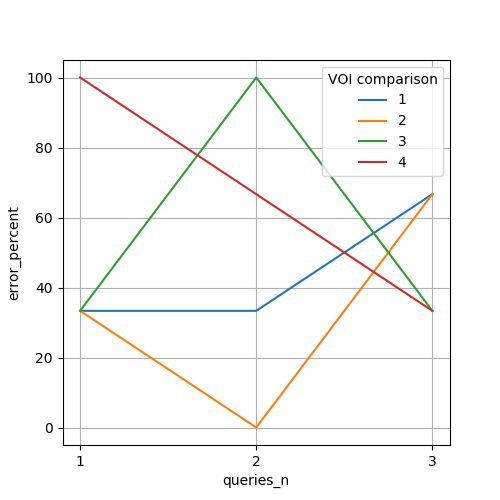

In [19]:
import csv
import statistics 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from collections import defaultdict

with open('batch.csv') as csv_file:
    
    #Lettura file csv
    data = pd.read_csv(csv_file)
    
    #Dichiarazione array che conterrà l'output
    voidata = [] 
    finalArray = [] 
    
    #Dizionari
    voiDict = defaultdict(list) 
    queryDict = defaultdict(list) 
    wrongRecCountDict = defaultdict(list) 
    userCountDict = defaultdict(list) 
    voiPerformanceDict = defaultdict(list) 
    voiAccuracyDict = defaultdict(list)
    resultDict = defaultdict(list)
    
    #Conteggio dei beliefImprovement presenti
    vois = data.beliefImprovement.unique()
    voisCount = data.beliefImprovement.nunique()
    queriesList = data['query'].unique()
    queryCount = data['query'].nunique()
    users = data.user.unique()
    userCount = data.user.nunique()
    
    #Per ogni riga del dataframe
    for index, row in data.iterrows():
        
        if row["beliefImprovement"] not in voiDict[(row["beliefImprovement"],row["query"])]:
            voiDict[(row["beliefImprovement"],row["query"])].append(row["beliefImprovement"])
            
        if row["query"] not in queryDict[(row["beliefImprovement"],row["query"])]:
            queryDict[(row["beliefImprovement"],row["query"])].append(row["query"])
            
        wrongRecCountDict[(row["beliefImprovement"],row["query"])].append(0)
        if row["recommended"] != row["top"]:
            wrongRecCountDict[(row["beliefImprovement"],row["query"])].append(1)
            
        voiPerformanceDict[(row["beliefImprovement"],row["query"])].append(row["time"])
        voiAccuracyDict[(row["beliefImprovement"],row["query"])].append(abs(row["recUtil"]-row["topUtil"]))
        
    
    for k,v in voiDict.items():
        resultDict[k].append(v)
        
    
    for k,v in queryDict.items():
        resultDict[k].append(v)
        
        
    for k,v in resultDict.items():
        resultDict[k].append(statistics.mean(voiPerformanceDict[k]))
        resultDict[k].append(statistics.stdev(voiPerformanceDict[k]))
        resultDict[k].append((sum(wrongRecCountDict[k])*100)/userCount)
        resultDict[k].append(statistics.mean(voiAccuracyDict[k]))
        resultDict[k].append(statistics.stdev(voiAccuracyDict[k]))
    
    #Creo il dataframe di output
    result = pd.DataFrame.from_dict(resultDict, orient='index', columns=['beliefImprovement','query_n','average_time', 'stdev_time', 'error_percent', 'average_diff', 'stdev_diff'])
    
    print('\n')
    print(data)
    print('\n')
    print(result)
    print('\n')
    
    #Grafico di comparazione dell'errore percentuale dei VOI con l'aumentare del numero di query
    fig = plt.figure(figsize=(5,5))
    ax = fig.subplots()
  
    for beliefImprovement in vois:
        x_axis = [] 
        y_axis = [] 
        
        for index, row in result.iterrows():       
            if row["beliefImprovement"] == beliefImprovement:
                x_axis.append(row["query_n"])
                y_axis.append(row["error_percent"])
        
        ax.plot(x_axis, y_axis, label=beliefImprovement)
        
    ax.set(xlabel='queries_n', xticks=queriesList, ylabel='error_percent')
    ax.grid()
    ax.legend(title="VOI comparison")
    plt.show()